# Churn Scoring

### Import data and notebooks

In [84]:
import pandas as pd
import numpy as np
from datetime import datetime

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
Ecomdata = 'https://github.com/AsmaMora/MADT8101/raw/main/3.Churn_Scoring/E_Commerce_Dataset.xlsx'

In [87]:
df = pd.read_excel(Ecomdata, sheet_name = "E Comm")

### Expore data

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [51]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [52]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [53]:
#check na.
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

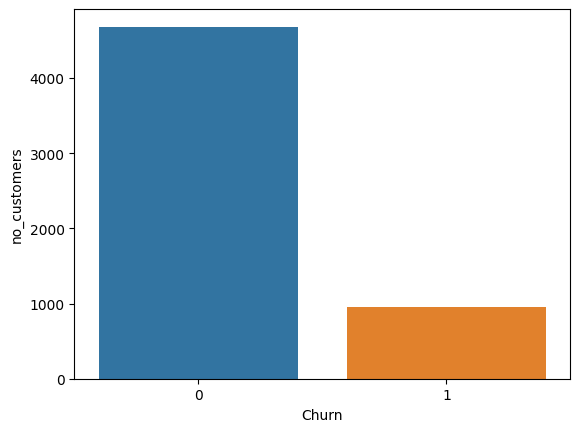

In [55]:
#Expore no.customer by churn
df_noCust_by_target = df.groupby(by=['Churn']).agg(
          no_customers=('Churn','count')).reset_index()

sns.barplot(data=df_noCust_by_target, x='Churn', y='no_customers')
plt.show()

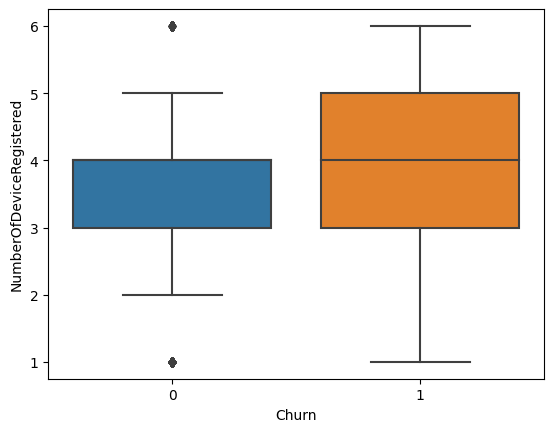

In [10]:
#Explore avg NumberOfDeviceRegistered by Churn

sns.boxplot(data=df, x='Churn', y='NumberOfDeviceRegistered')
plt.show()


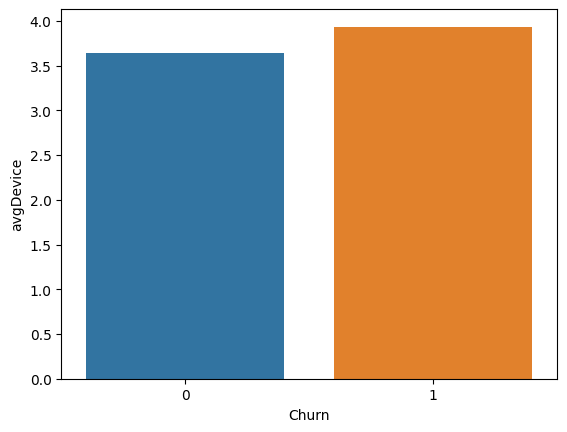

In [56]:
#Explore avg NumberOfDeviceRegistered by Churn

df_by_target = df.groupby(by=['Churn']).agg(
          avgDevice=('NumberOfDeviceRegistered','mean')).reset_index()

sns.barplot(data=df_by_target, x='Churn', y='avgDevice')
plt.show()

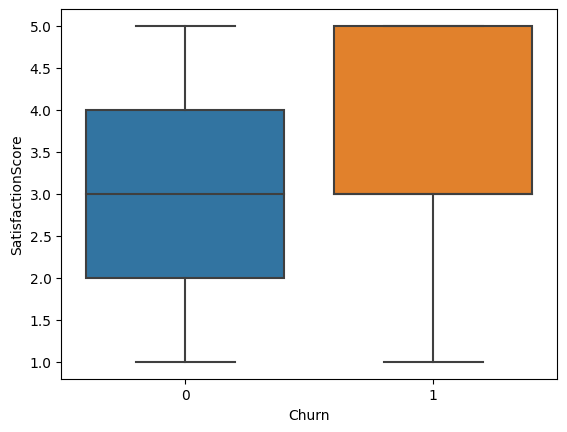

In [57]:
#Explore avg SatisfactionScore by Churn

sns.boxplot(data=df, x='Churn', y='SatisfactionScore')
plt.show()

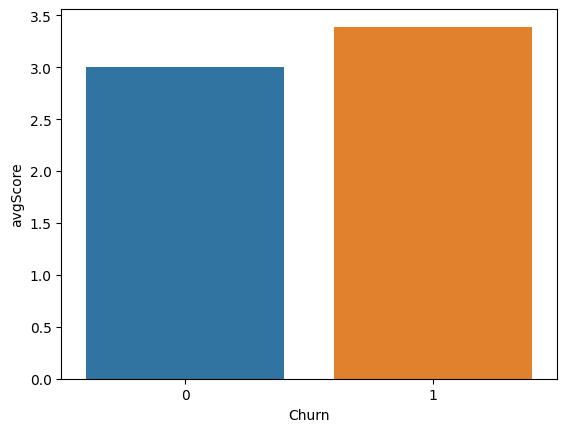

In [58]:
#Explore avg SatisfactionScore by Churn

df_by_target = df.groupby(by=['Churn']).agg(
          avgScore=('SatisfactionScore','mean')).reset_index()

sns.barplot(data=df_by_target, x='Churn', y='avgScore')
plt.show()

<ipython-input-59-971fc090c12c>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Churn','count')).reset_index().pivot('PreferredLoginDevice', 'Churn', 'no_customers')


<Axes: xlabel='Churn', ylabel='PreferredLoginDevice'>

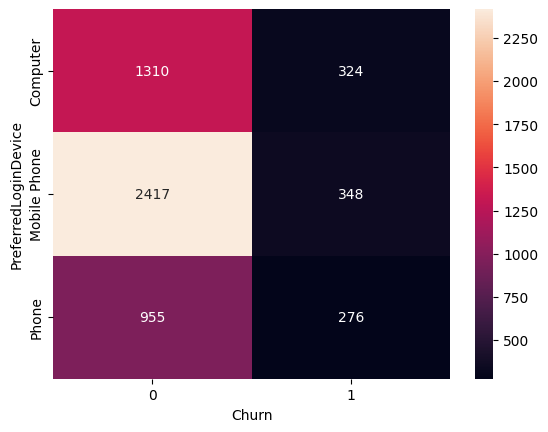

In [59]:
#Explore PreferredLoginDevice by Churn

df_Device_by_churn = df.groupby(by=['PreferredLoginDevice', 'Churn']).agg(
                              no_customers=('Churn','count')).reset_index().pivot('PreferredLoginDevice', 'Churn', 'no_customers')

sns.heatmap(df_Device_by_churn, annot=True, fmt='.0f')

### Clean data

In [60]:
#drop na.
df = df.dropna(how='any',axis=0)

In [61]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress   

### Create dummy variable

In [63]:
#dummies

df_dummmies = pd.get_dummies(df[['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']])
df_dummmies

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
11,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
12,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5625,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5627,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
5628,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [64]:
#merge dummy
df = df.merge(df_dummmies, left_index=True, right_index=True, how='inner')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             3774 non-null   int64  
 1   Churn                                  3774 non-null   int64  
 2   Tenure                                 3774 non-null   float64
 3   PreferredLoginDevice                   3774 non-null   object 
 4   CityTier                               3774 non-null   int64  
 5   WarehouseToHome                        3774 non-null   float64
 6   PreferredPaymentMode                   3774 non-null   object 
 7   Gender                                 3774 non-null   object 
 8   HourSpendOnApp                         3774 non-null   float64
 9   NumberOfDeviceRegistered               3774 non-null   int64  
 10  PreferedOrderCat                       3774 non-null   object 
 11  Sati

### Prepare data for ML

In [66]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# model selection and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

#fixing imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

In [67]:
#Create variable
X = df.drop(['CustomerID' , 'Churn','PreferredLoginDevice','PreferredPaymentMode','Gender', 'PreferedOrderCat','MaritalStatus'], axis=1)
y = df['Churn']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [69]:
#X variable scaling
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(x_scaled)
X_train_scaled.columns = X_train.columns

x_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(x_scaled)
X_test_scaled.columns = X_test.columns

In [70]:
class ModelEvaluator:
    def __init__(self, models,X_train, X_test, y_train, y_test):
        self.models = models
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    #Create Generic function to fit data and display results/predictions
    #clf = classifer
    def fit_evaluate(self):
        results = []

        for model_name, model in self.models.items():
          samplers = {'no_sampler':'none',
            'Under_Sampler': RandomUnderSampler(random_state=0),
            'Over_Sampler': RandomOverSampler(random_state=0),
            'SMOTE_Sampler': SMOTE(random_state=0),
          }


          for sampler_name, sampler in samplers.items():
            if sampler != 'none':
              sampler.fit(self.X_train, self.y_train)
              X_trainS, y_trainS = sampler.fit_resample(self.X_train, self.y_train)
            else:
              X_trainS = self.X_train
              y_trainS = self.y_train

            # fit model to training data
            model.fit(X_trainS, y_trainS)

            # make predictions for train data
            y_pred_train = model.predict(X_trainS)

            # make predictions for test data
            y_pred_test = model.predict(self.X_test)
            # print evaluation
            print(classification_report(self.y_test, y_pred_test))

            # Calculate F1 score
            f1 = f1_score(self.y_test, y_pred_test)
            precision = precision_score(self.y_test, y_pred_test)
            recall = recall_score(self.y_test, y_pred_test)

            results.append({'Model': model_name, 'Sampler': sampler_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
            print(f'Model: {model_name}, Sampler: {sampler_name}')
            print('\nConfusion Matrix: \n')
            s = sns.heatmap(confusion_matrix(self.y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
            s.set(xlabel='Predicted class', ylabel='True class')
            plt.show()

            fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_trainS)
            auc_train = roc_auc_score(y_pred_train, y_trainS)
            plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')
            fpr_test, tpr_test, _ = roc_curve(y_pred_test,  self.y_test)
            auc_test = roc_auc_score(y_pred_test, self.y_test)
            plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.legend(loc=4)
            plt.show()
        return pd.DataFrame(results)

### ML evaluation
Show model evaluation result, confusion and ROC curve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1274
           1       0.78      0.53      0.63       236

    accuracy                           0.90      1510
   macro avg       0.85      0.75      0.79      1510
weighted avg       0.90      0.90      0.90      1510

Model: Logistic Regression, Sampler: no_sampler

Confusion Matrix: 



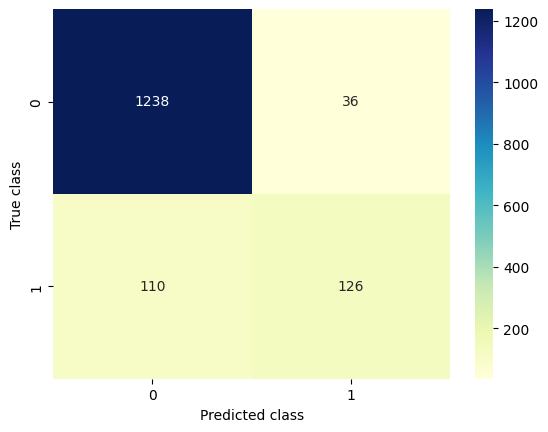

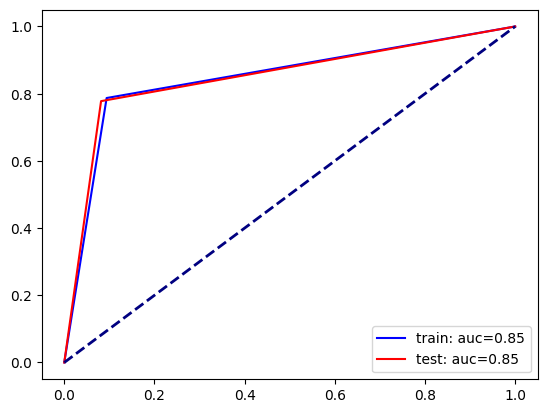

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1274
           1       0.43      0.83      0.57       236

    accuracy                           0.80      1510
   macro avg       0.70      0.81      0.72      1510
weighted avg       0.88      0.80      0.83      1510

Model: Logistic Regression, Sampler: Under_Sampler

Confusion Matrix: 



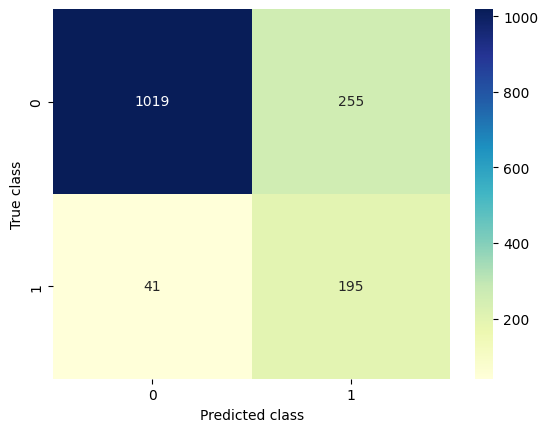

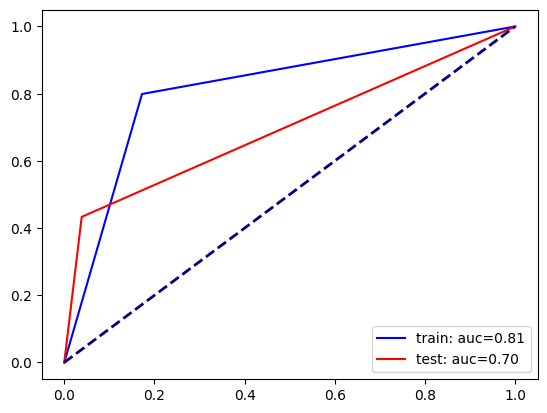

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1274
           1       0.43      0.82      0.57       236

    accuracy                           0.80      1510
   macro avg       0.70      0.81      0.72      1510
weighted avg       0.88      0.80      0.82      1510

Model: Logistic Regression, Sampler: Over_Sampler

Confusion Matrix: 



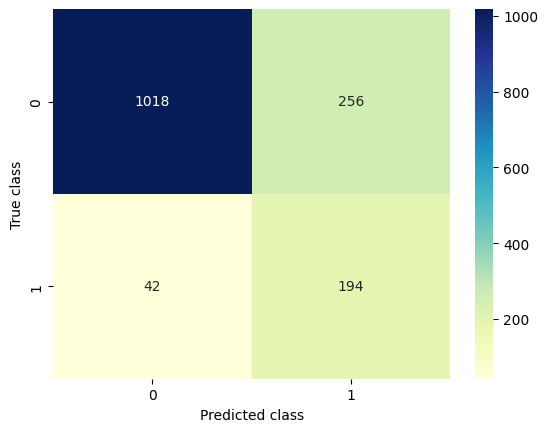

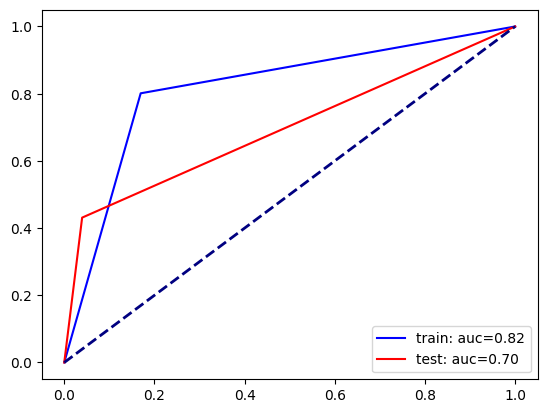

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1274
           1       0.54      0.68      0.60       236

    accuracy                           0.86      1510
   macro avg       0.74      0.79      0.76      1510
weighted avg       0.88      0.86      0.87      1510

Model: Logistic Regression, Sampler: SMOTE_Sampler

Confusion Matrix: 



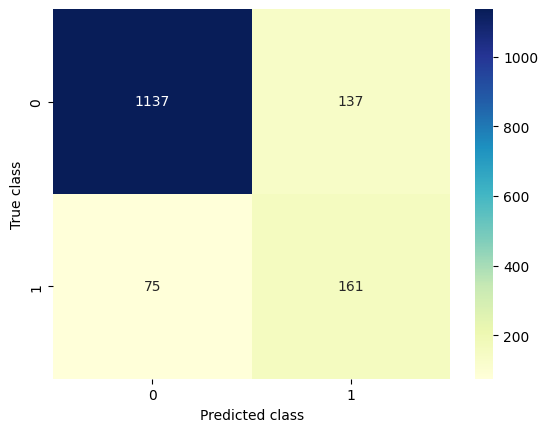

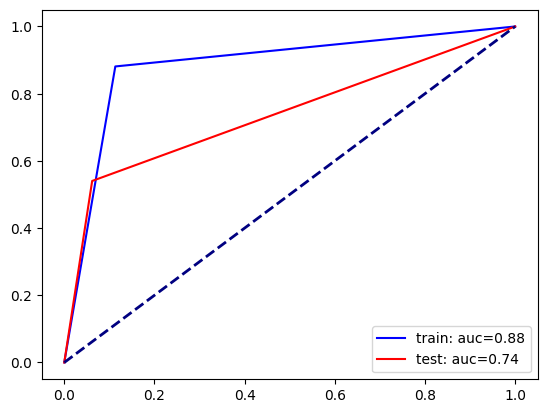

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1274
           1       0.93      0.65      0.76       236

    accuracy                           0.94      1510
   macro avg       0.93      0.82      0.86      1510
weighted avg       0.94      0.94      0.93      1510

Model: Random Forest, Sampler: no_sampler

Confusion Matrix: 



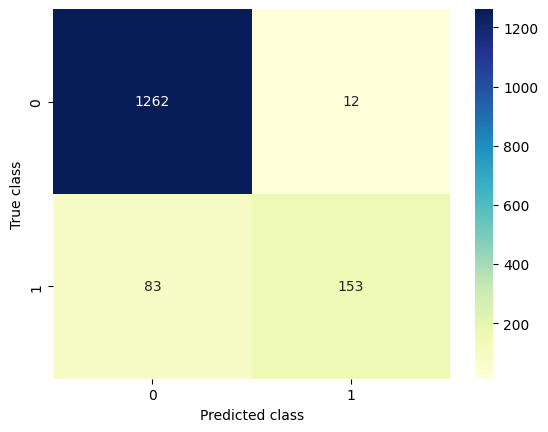

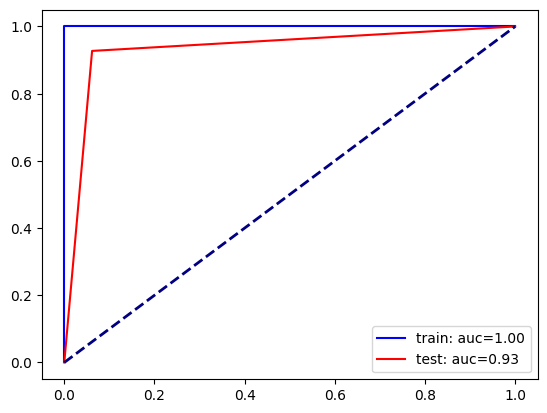

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1274
           1       0.59      0.86      0.70       236

    accuracy                           0.88      1510
   macro avg       0.78      0.87      0.81      1510
weighted avg       0.91      0.88      0.89      1510

Model: Random Forest, Sampler: Under_Sampler

Confusion Matrix: 



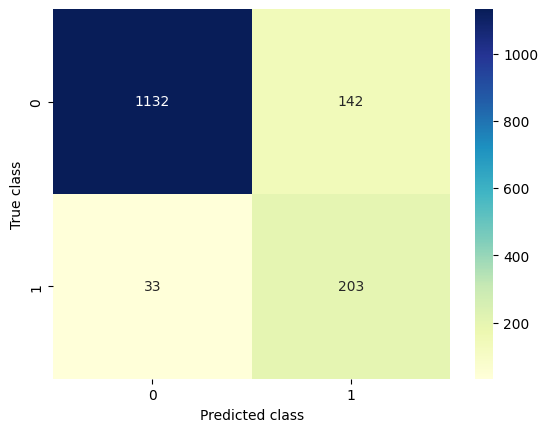

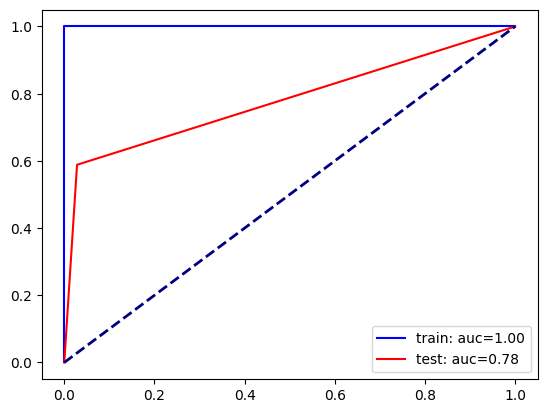

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1274
           1       0.91      0.75      0.82       236

    accuracy                           0.95      1510
   macro avg       0.93      0.87      0.90      1510
weighted avg       0.95      0.95      0.95      1510

Model: Random Forest, Sampler: Over_Sampler

Confusion Matrix: 



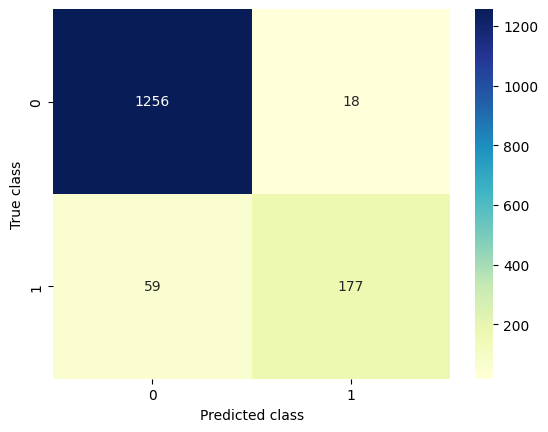

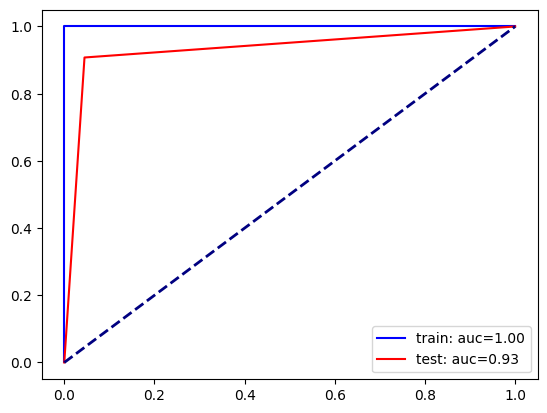

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1274
           1       0.84      0.62      0.72       236

    accuracy                           0.92      1510
   macro avg       0.89      0.80      0.84      1510
weighted avg       0.92      0.92      0.92      1510

Model: Random Forest, Sampler: SMOTE_Sampler

Confusion Matrix: 



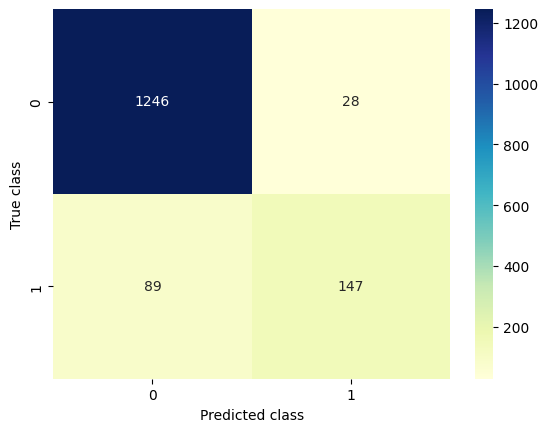

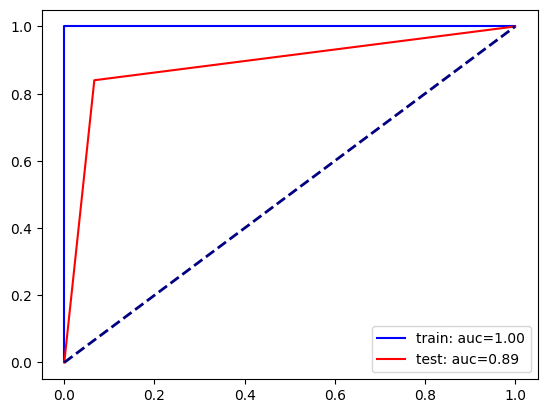

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1274
           1       0.58      0.39      0.47       236

    accuracy                           0.86      1510
   macro avg       0.74      0.67      0.69      1510
weighted avg       0.85      0.86      0.85      1510

Model: KNeighbors, Sampler: no_sampler

Confusion Matrix: 



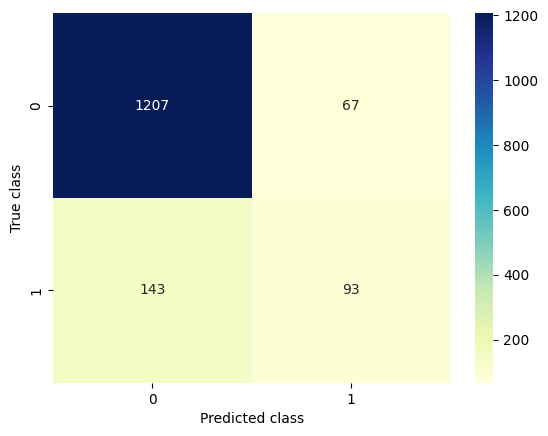

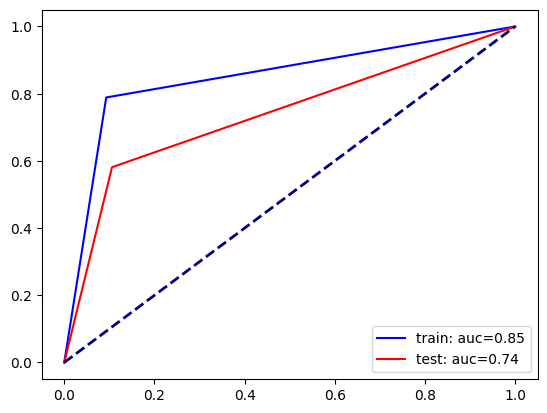

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1274
           1       0.35      0.81      0.49       236

    accuracy                           0.73      1510
   macro avg       0.65      0.76      0.65      1510
weighted avg       0.86      0.73      0.77      1510

Model: KNeighbors, Sampler: Under_Sampler

Confusion Matrix: 



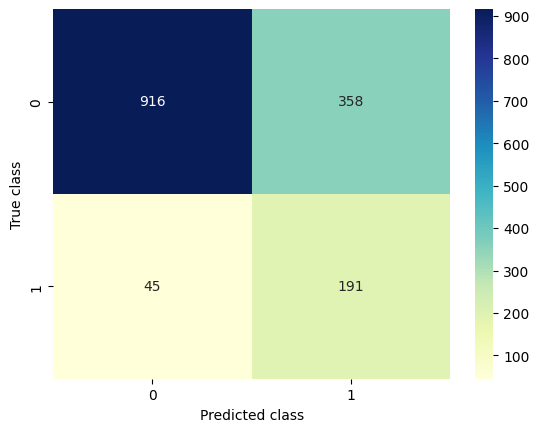

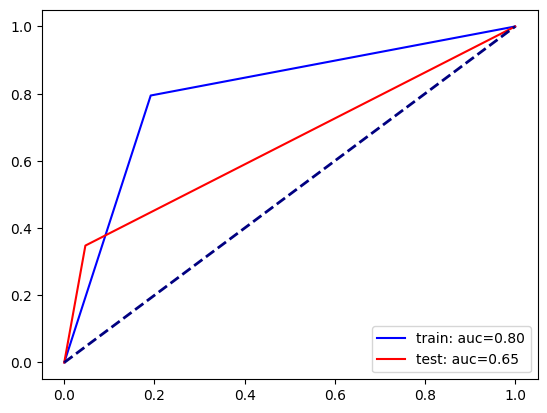

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1274
           1       0.45      0.83      0.59       236

    accuracy                           0.82      1510
   macro avg       0.71      0.82      0.73      1510
weighted avg       0.88      0.82      0.84      1510

Model: KNeighbors, Sampler: Over_Sampler

Confusion Matrix: 



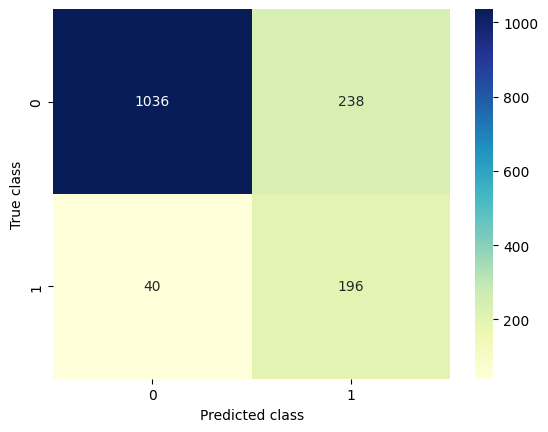

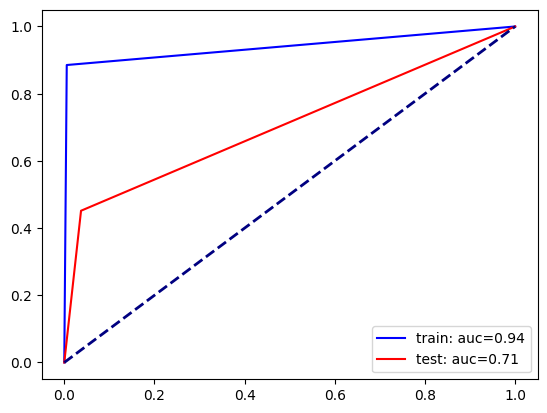

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      1274
           1       0.44      0.85      0.58       236

    accuracy                           0.81      1510
   macro avg       0.70      0.82      0.73      1510
weighted avg       0.88      0.81      0.83      1510

Model: KNeighbors, Sampler: SMOTE_Sampler

Confusion Matrix: 



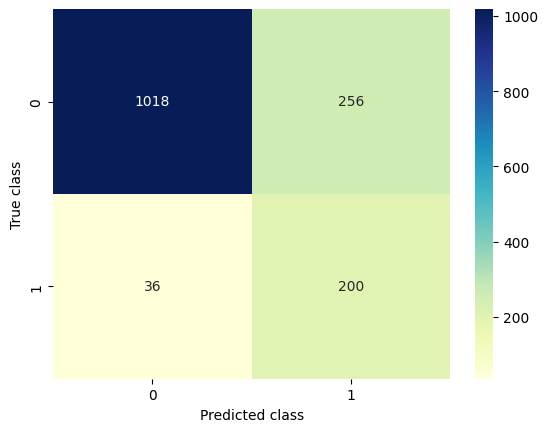

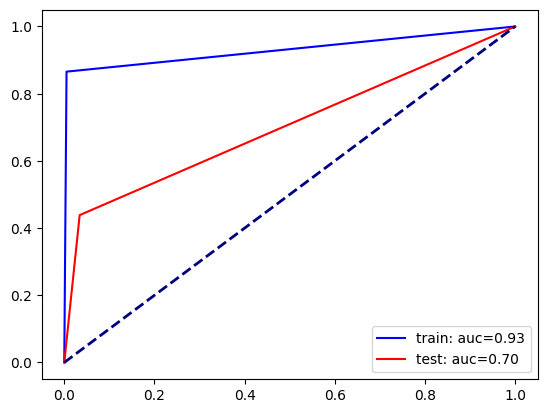

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1274
           1       0.92      0.78      0.84       236

    accuracy                           0.95      1510
   macro avg       0.94      0.88      0.91      1510
weighted avg       0.95      0.95      0.95      1510

Model: XGBoost, Sampler: no_sampler

Confusion Matrix: 



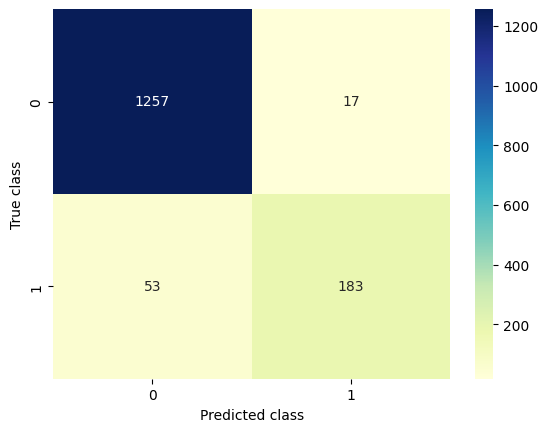

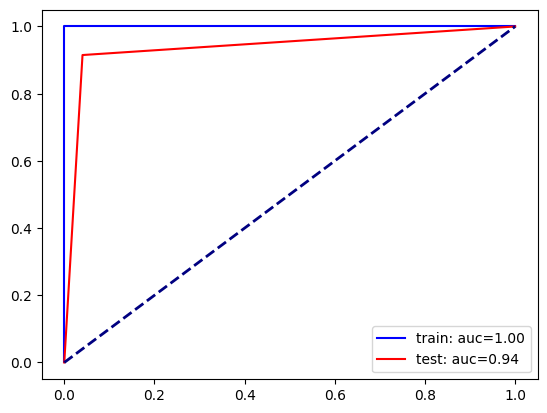

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1274
           1       0.61      0.87      0.72       236

    accuracy                           0.89      1510
   macro avg       0.79      0.88      0.82      1510
weighted avg       0.92      0.89      0.90      1510

Model: XGBoost, Sampler: Under_Sampler

Confusion Matrix: 



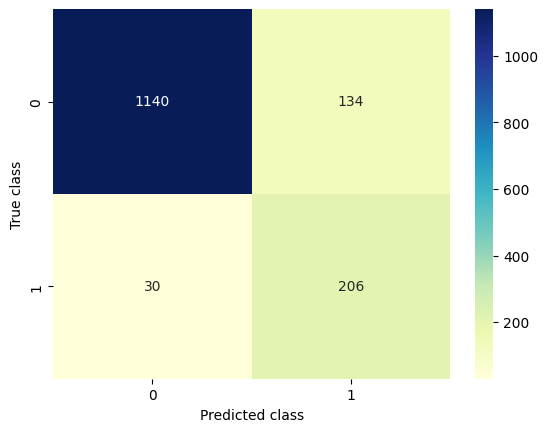

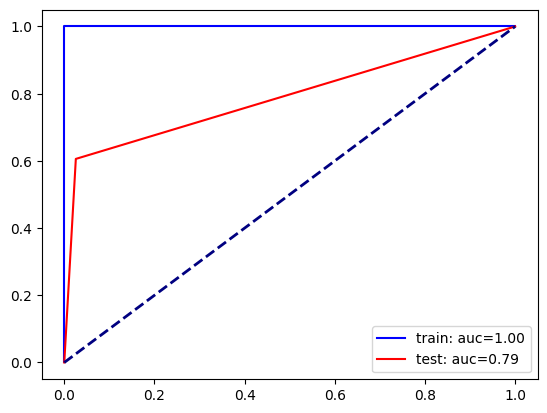

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1274
           1       0.88      0.83      0.85       236

    accuracy                           0.96      1510
   macro avg       0.92      0.90      0.91      1510
weighted avg       0.95      0.96      0.96      1510

Model: XGBoost, Sampler: Over_Sampler

Confusion Matrix: 



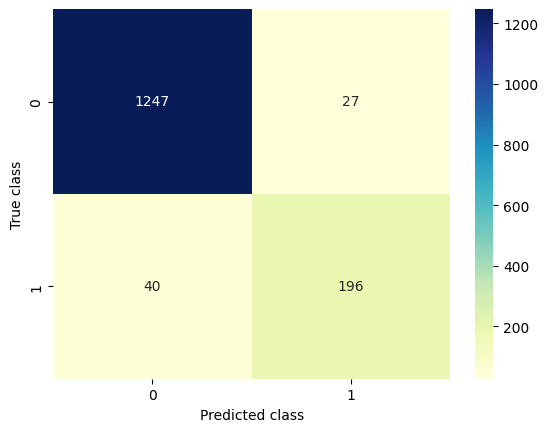

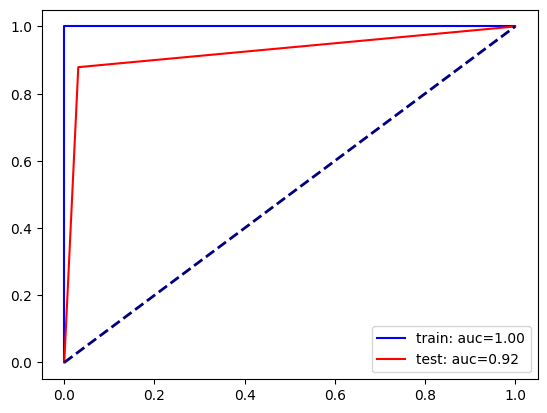

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1274
           1       0.86      0.75      0.80       236

    accuracy                           0.94      1510
   macro avg       0.91      0.86      0.88      1510
weighted avg       0.94      0.94      0.94      1510

Model: XGBoost, Sampler: SMOTE_Sampler

Confusion Matrix: 



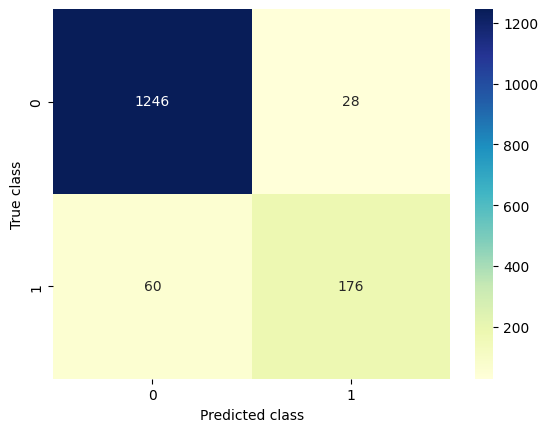

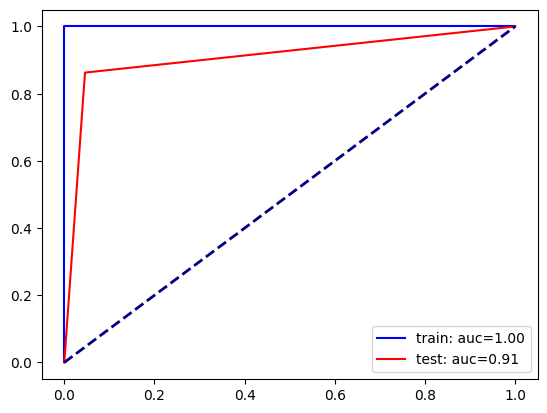

                  Model        Sampler  Precision    Recall  F1 Score
0   Logistic Regression     no_sampler   0.777778  0.533898  0.633166
1   Logistic Regression  Under_Sampler   0.433333  0.826271  0.568513
2   Logistic Regression   Over_Sampler   0.431111  0.822034  0.565598
3   Logistic Regression  SMOTE_Sampler   0.540268  0.682203  0.602996
4         Random Forest     no_sampler   0.927273  0.648305  0.763092
5         Random Forest  Under_Sampler   0.588406  0.860169  0.698795
6         Random Forest   Over_Sampler   0.907692  0.750000  0.821346
7         Random Forest  SMOTE_Sampler   0.840000  0.622881  0.715328
8            KNeighbors     no_sampler   0.581250  0.394068  0.469697
9            KNeighbors  Under_Sampler   0.347905  0.809322  0.486624
10           KNeighbors   Over_Sampler   0.451613  0.830508  0.585075
11           KNeighbors  SMOTE_Sampler   0.438596  0.847458  0.578035
12              XGBoost     no_sampler   0.915000  0.775424  0.839450
13              XGBo

In [71]:
# Specify the models you want to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}
evaluator = ModelEvaluator(models,X_train, X_test, y_train, y_test)
results = evaluator.fit_evaluate()
print(results)

### Show feature importance

In [80]:
#classification model
def classification_model(clf, X_train, y_train, X_test, y_test, show_feature_importance=True):
  ls_y_hat_train = []
  ls_y_train = []

  clf_model = clf.fit(X_train, y_train)
  y_hat_train = clf_model.predict(X_train)
  ls_y_hat_train.extend(y_hat_train)
  ls_y_train.extend(y_train)
  report_train = classification_report(ls_y_train, ls_y_hat_train)
  ls_y_hat_test = []
  ls_y_test = []
  y_hat_test = clf_model.predict(X_test)
  ls_y_hat_test.extend(y_hat_test)
  ls_y_test.extend(y_test)
  report_test = classification_report(ls_y_test, ls_y_hat_test)

In [81]:
import matplotlib.pyplot as plt

# classification model
def classification_model(clf, X_train, y_train, X_test, y_test, show_feature_importance=True):
    clf_model = clf.fit(X_train, y_train)
    y_hat_train = clf_model.predict(X_train)
    report_train = classification_report(y_train, y_hat_train)

    y_hat_test = clf_model.predict(X_test)
    report_test = classification_report(y_test, y_hat_test)

    print('Training Set Classification Report:')
    print(report_train)
    print('\n')

    print('Test Set Classification Report:')
    print(report_test)
    print('\n')

    if show_feature_importance:
        try:
            print('Standardized Coeff.')
            if hasattr(clf_model, 'coef_'):
                feature_importances = clf_model.coef_[0]
            elif hasattr(clf_model, 'feature_importances_'):
                feature_importances = clf_model.feature_importances_
            else:
                raise AttributeError("Model does not have attribute 'coef_' or 'feature_importances_'")

            coefficients = pd.DataFrame({"Feature": X_train.columns.tolist(), "Importance": feature_importances})
            coefficients = coefficients.sort_values(by="Importance", ascending=False)

            # Reverse sort order
            coefficients = coefficients[::-1]

            plt.figure(figsize=(10, 6))
            plt.barh(coefficients["Feature"], coefficients["Importance"])

            # Add data labels
            for i, v in enumerate(coefficients["Importance"]):
                plt.text(v, i, f"{v:.4f}", color='black', va='center')

            plt.xlabel("Importance")
            plt.ylabel("Feature")
            plt.title("Feature Importance")
            plt.show()
        except AttributeError as e:
            print(str(e))

In [82]:
#create oversampling variable
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X_train_scaled, y_train)
X_oversampled, y_oversampled = ros.fit_resample(X_train_scaled, y_train)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1869
           1       0.86      0.81      0.84      1869

    accuracy                           0.84      3738
   macro avg       0.84      0.84      0.84      3738
weighted avg       0.84      0.84      0.84      3738



Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      1274
           1       0.52      0.78      0.62       236

    accuracy                           0.85      1510
   macro avg       0.74      0.82      0.76      1510
weighted avg       0.89      0.85      0.86      1510



Standardized Coeff.


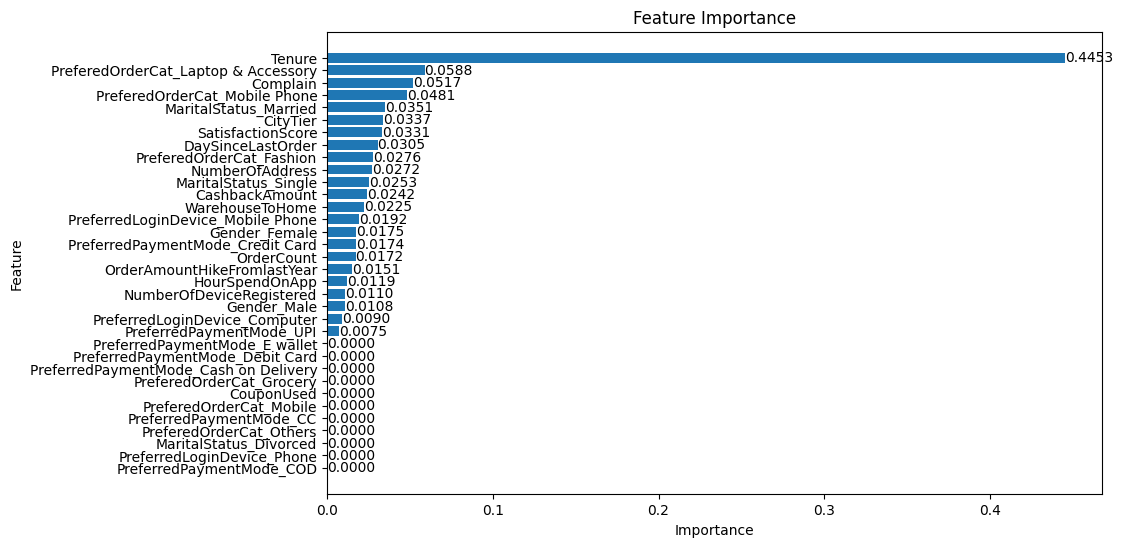

In [83]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',
                              learning_rate =0.01,
                              n_estimators=100,
                              max_depth=3,
                              gamma=0.0,
                              colsample_bytree=0.6)

classification_model(xgb_clf, X_oversampled, y_oversampled, X_test_scaled, y_test)